# Household electricity consumption

## Problem Statement:

### To predict the individual household electricity consumption depending on the following attributes.

### Dataset

https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption

### Attribute Information

### Task

In [ ]:
1. Data ingestion
2. Exploratory data analysis
3. Handling the outliers
4. Store the preprocessed data in mongoDB
5. Retrive data from mongoDB
6. Model Building
7. Standardize Scaler
8. Dumo the preprocessed data into pickle file
9. Linear Regression
10. Ridge Regression
11. Lasso Regression
12. Support vector Regression
13. Hyper-parameter turning the SVM model using GridSearchCV
14. Report ( Summary )
15. Store the Best Model in pickle file.


In [1]:
#import neccesary libraries

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [2]:
#import dataset
data=pd.read_csv(r'household_power_consumption.txt',sep=';',low_memory=False,na_values=['nan','?'])

## EDA

In [3]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
data.shape

(2075259, 9)

In [5]:
#checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [6]:
#data types of 'Date' and 'time' feature are not correct

In [7]:
#converting Date feature datatype to datetime
data['Date']=pd.to_datetime(data['Date'])
data['Time']=pd.to_datetime(data['Time'])

C:\Users\anike\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/12/2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\anike\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17/12/2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\anike\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/12/2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\anike\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/12/2006' in DD/MM/YYYY format. Provide format or specif

In [8]:
#Grouping data on the basis of dates
#data=data.groupby('Date').sum()

In [9]:
#data.reset_index(inplace=True)

In [10]:
#creating three columns day,month and year
data['Day']=data['Date'].dt.day
data['Month']=data['Date'].dt.month
data['Year']=data['Date'].dt.year
data['Hour']=data['Time'].dt.hour

In [11]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day,Month,Year,Hour
0,2006-12-16,2022-11-15 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,16,12,2006,17
1,2006-12-16,2022-11-15 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,16,12,2006,17
2,2006-12-16,2022-11-15 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,16,12,2006,17
3,2006-12-16,2022-11-15 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,16,12,2006,17
4,2006-12-16,2022-11-15 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,16,12,2006,17


In [12]:
#dropping date column
data.drop('Date',axis=1,inplace=True)
data.drop('Time',axis=1,inplace=True)

In [13]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day,Month,Year,Hour
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,16,12,2006,17
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,16,12,2006,17
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,16,12,2006,17
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,16,12,2006,17
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,16,12,2006,17


In [14]:
#checking for null values
data.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Day                          0
Month                        0
Year                         0
Hour                         0
dtype: int64

In [15]:
#dropping rows with null values
null_values = data[data['Global_active_power'].isna()].index

In [16]:
data.drop(null_values,axis = 0, inplace = True)

In [17]:
data.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Day                      0
Month                    0
Year                     0
Hour                     0
dtype: int64

In [18]:
# checking for duplicates rows
data.duplicated().sum()

10546

In [19]:
#Combine all the three sub-meters into one 
data['power_consumption'] = data['Sub_metering_1']+data['Sub_metering_2']+data['Sub_metering_3']

In [20]:
data.head(1)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day,Month,Year,Hour,power_consumption
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,16,12,2006,17,18.0


In [21]:
#Target variable power consumption
pow_consumption=(data['Global_active_power']*1000/60)
city_power_consumption=data['Sub_metering_1']+data['Sub_metering_2']+data['Sub_metering_3']
data['power_consumption']=pow_consumption-city_power_consumption

In [22]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day,Month,Year,Hour,power_consumption
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,16,12,2006,17,52.266667
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,16,12,2006,17,72.333333
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,16,12,2006,17,70.566667
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,16,12,2006,17,71.800000
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,16,12,2006,17,43.100000


In [23]:
data['tot_sub_metering']=data['Sub_metering_1']+data['Sub_metering_2']+data['Sub_metering_3']

In [24]:
data=data.drop(['Sub_metering_1','Sub_metering_2','Sub_metering_3'],axis=1)

In [25]:
data.head(5)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Day,Month,Year,Hour,power_consumption,tot_sub_metering
0,4.216,0.418,234.84,18.4,16,12,2006,17,52.266667,18.0
1,5.360,0.436,233.63,23.0,16,12,2006,17,72.333333,17.0
2,5.374,0.498,233.29,23.0,16,12,2006,17,70.566667,19.0
3,5.388,0.502,233.74,23.0,16,12,2006,17,71.800000,18.0
4,3.666,0.528,235.68,15.8,16,12,2006,17,43.100000,18.0


In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,2049280.0,1.091615,1.057294,0.076,0.308,0.602,1.528000,11.122000
Global_reactive_power,2049280.0,0.123714,0.112722,0.000,0.048,0.100,0.194000,1.390000
Voltage,2049280.0,240.839858,3.239987,223.200,238.990,241.010,242.890000,254.150000
Global_intensity,2049280.0,4.627759,4.444396,0.200,1.400,2.600,6.400000,48.400000
Day,2049280.0,15.668919,8.838271,1.000,8.000,16.000,23.000000,31.000000
Month,2049280.0,6.497968,3.446016,1.000,4.000,7.000,10.000000,12.000000
Year,2049280.0,2008.424761,1.124388,2006.000,2007.000,2008.000,2009.000000,2010.000000
Hour,2049280.0,11.503906,6.925189,0.000,5.000,12.000,18.000000,23.000000
power_consumption,2049280.0,9.314693,9.585916,-2.400,3.800,5.500,10.366667,124.833333
tot_sub_metering,2049280.0,8.878891,12.862999,0.000,0.000,1.000,18.000000,134.000000


In [27]:
#checking distribution of dataset
#Normality Test

In [28]:
from scipy.stats import normaltest

In [29]:
for i in data.columns:
    norm_test = normaltest(data[i])[1]*100
    print(norm_test)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [30]:
#non normally distribution

C:\Users\anike\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Global_active_power', ylabel='Density'>

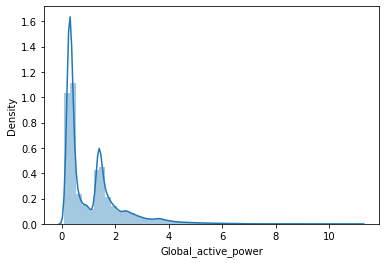

In [31]:
sns.distplot(data['Global_active_power'])

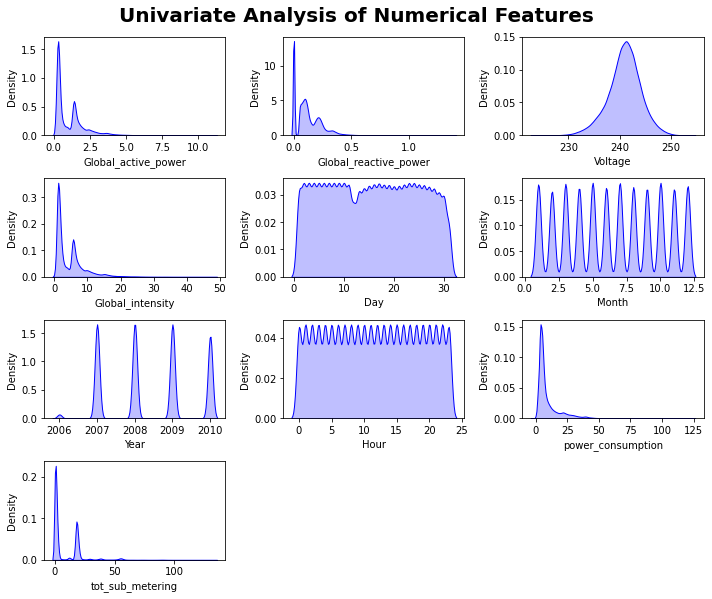

In [37]:
plt.figure(figsize=(10,10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=1.)

for i in range(0, len(data.columns)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=data[data.columns[i]],shade=True, color='b')
    plt.xlabel(data.columns[i])
    plt.tight_layout()

In [38]:
normaltest(data['Voltage'])[1]*100

0.0

In [39]:
data['Voltage'].skew()

-0.3266649756878288

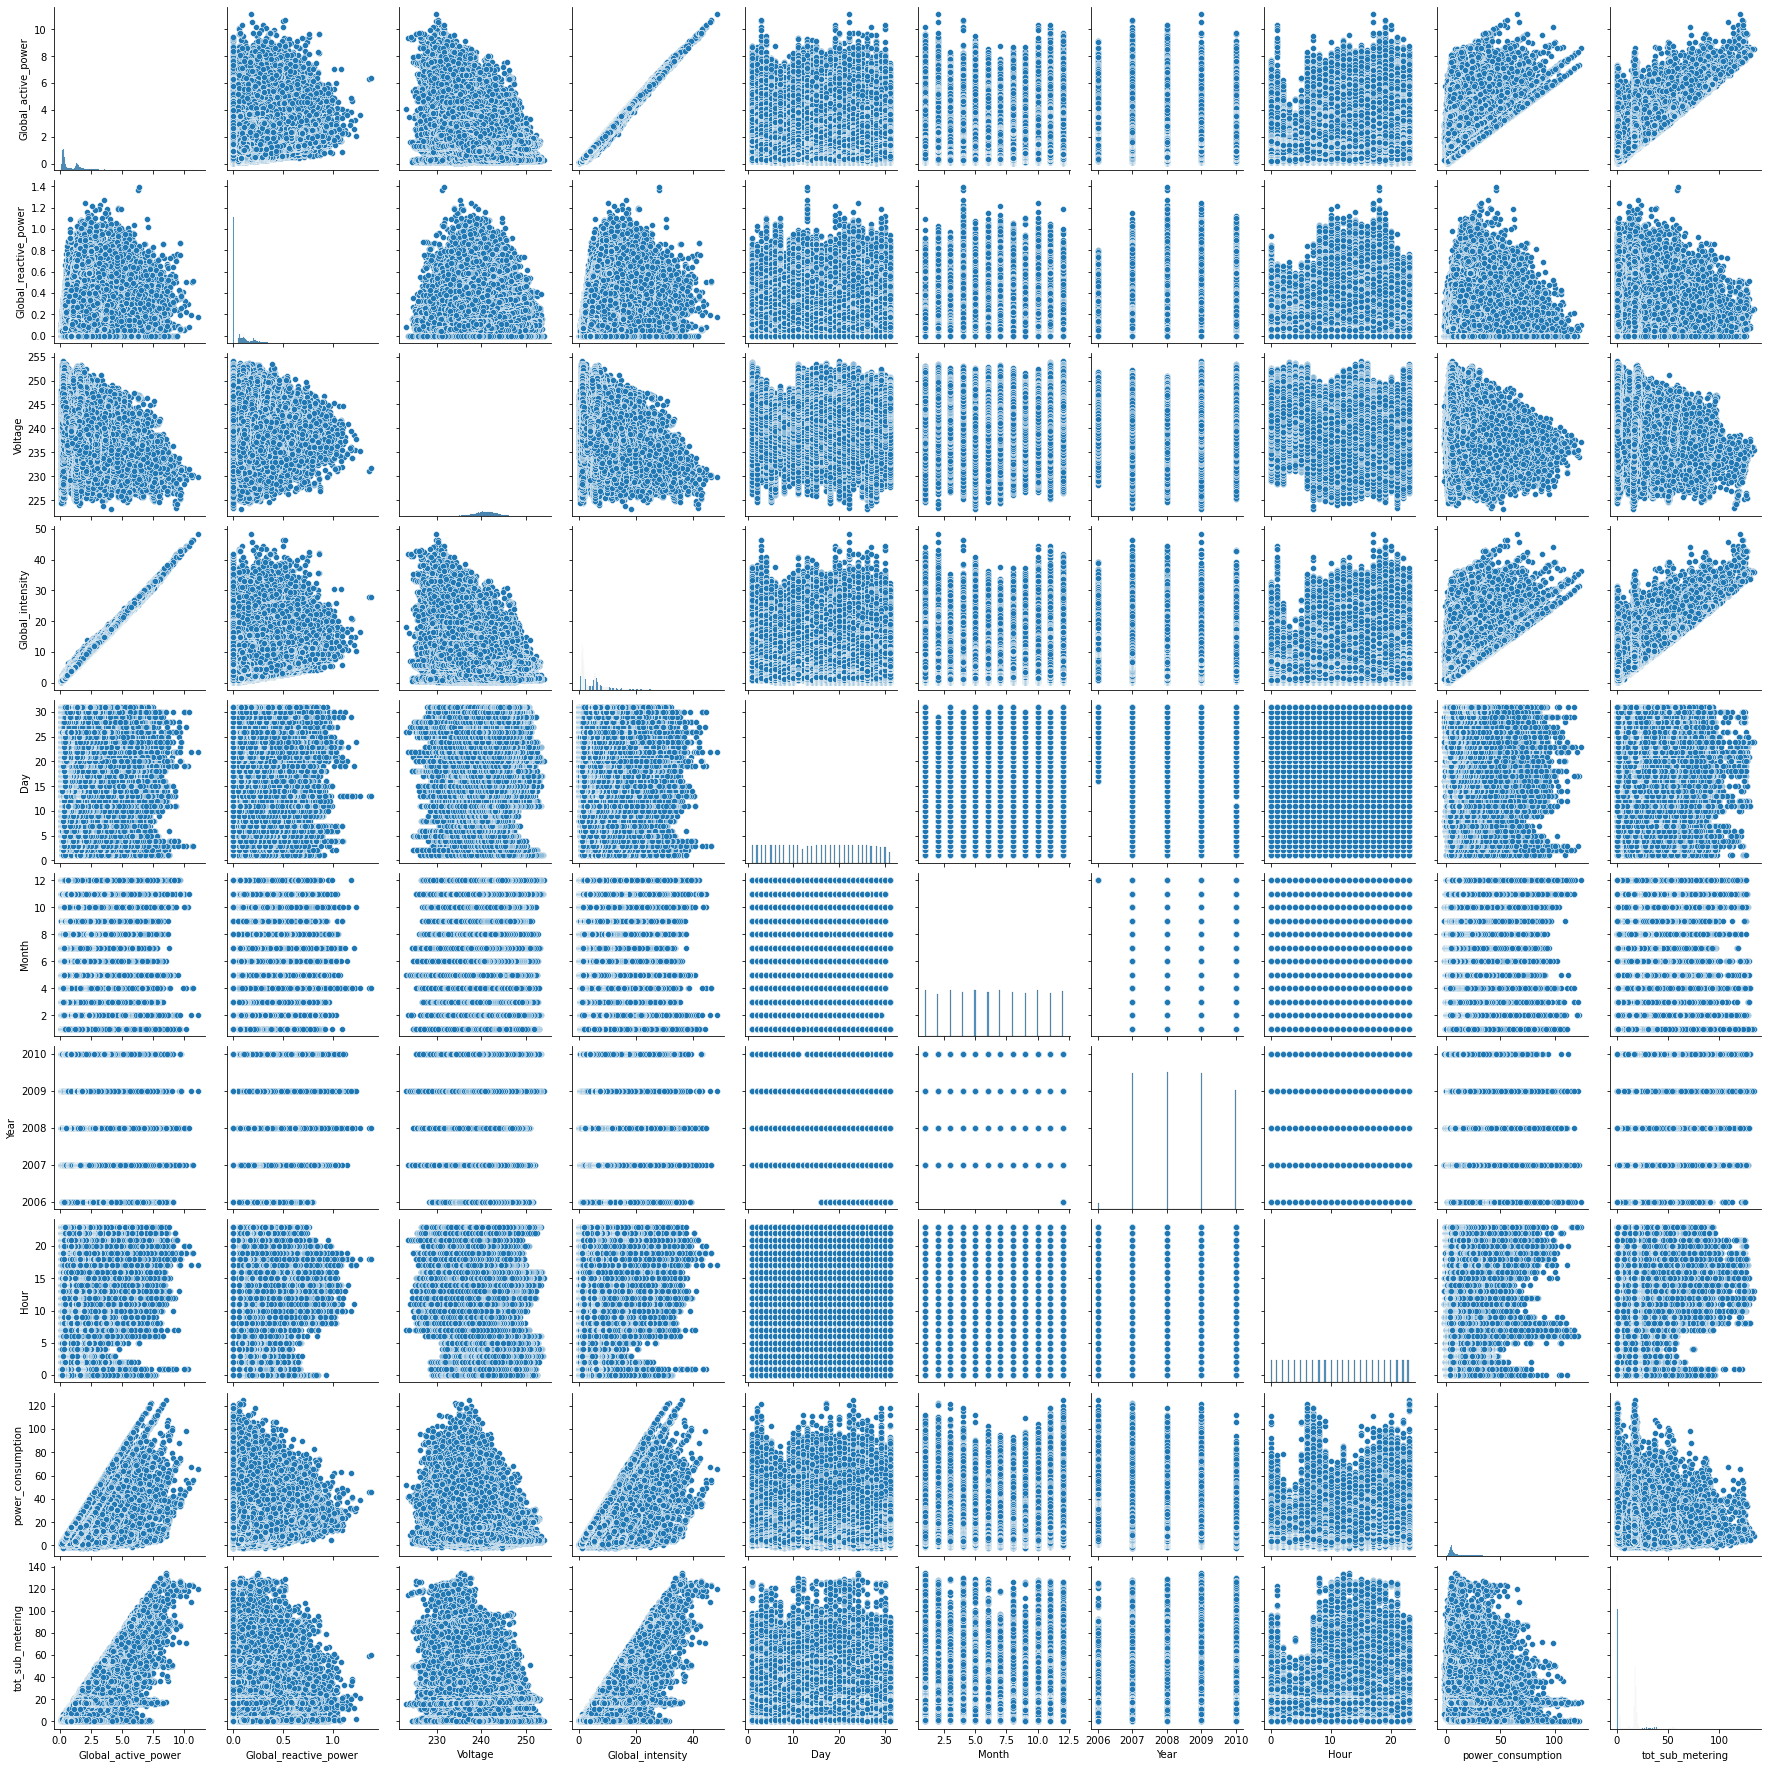

In [35]:
sns.pairplot(data = data)

In [36]:
# no linear relationship between target columns and input columns

In [37]:
#Check time of the day

In [32]:
#classify time of the day into bins for better visulaization
def time_of_day(x):
    if x in range(6,12):
        return "Morning"
    elif x in range(12,16):
        return "Afternoon"
    elif x in range(16,22):
        return "Evening"
    else:
        return "Late night"

In [33]:
data["Time_of_day"] = data['Hour'].apply(time_of_day)

In [34]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Day,Month,Year,Hour,power_consumption,tot_sub_metering,Time_of_day
0,4.216,0.418,234.84,18.4,16,12,2006,17,52.266667,18.0,Evening
1,5.360,0.436,233.63,23.0,16,12,2006,17,72.333333,17.0,Evening
2,5.374,0.498,233.29,23.0,16,12,2006,17,70.566667,19.0,Evening
3,5.388,0.502,233.74,23.0,16,12,2006,17,71.800000,18.0,Evening
4,3.666,0.528,235.68,15.8,16,12,2006,17,43.100000,18.0,Evening


In [35]:
#At which time of day power is consumed most in the city

In [44]:
data.groupby("Time_of_day")[['tot_sub_metering']].sum()

,tot_sub_metering
Time_of_day,
Afternoon,3910402.0
Evening,5298386.0
Late night,2662659.0
Morning,6323886.0


In [45]:
#more power consumption at morning and evening

In [46]:
data['Time_of_day'].value_counts()

Late night    683488
Evening       512702
Morning       511650
Afternoon     341440
Name: Time_of_day, dtype: int64

In [47]:
#time of day data is imbalanced

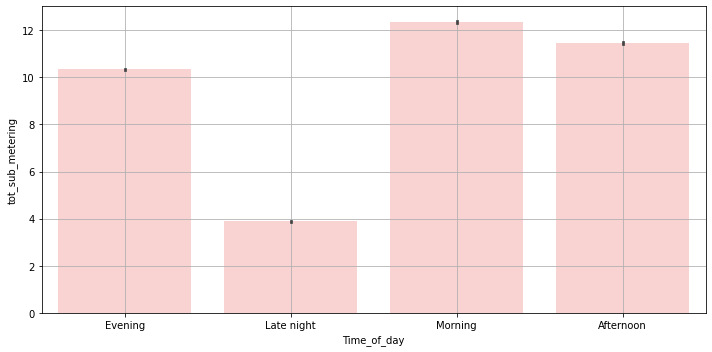

In [43]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Time_of_day', y ='tot_sub_metering', data = data, color ='#ffcccc')
plt.tight_layout()
plt.grid(True)
plt.show()

In [48]:
#Power Consumption with reference to months

In [51]:
data.groupby('Month')[['tot_sub_metering']].sum()

,tot_sub_metering
Month,
1,1782840.0
2,1377894.0
3,1685067.0
4,1449048.0
5,1633082.0
6,1442001.0
7,1197228.0
8,1242720.0
9,1464655.0


In [53]:
#more power consumption in 1,12 months

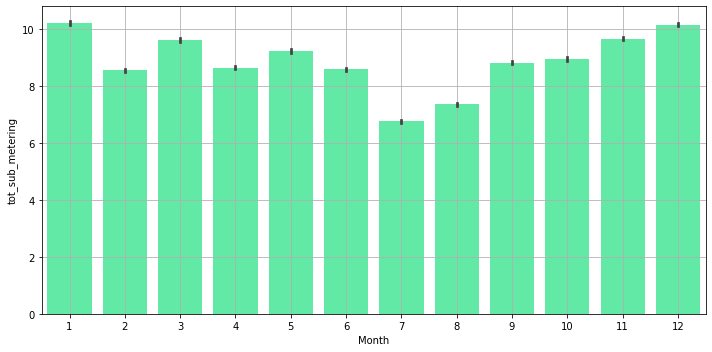

In [52]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Month', y ='tot_sub_metering', data = data, color ='#4dffa6' )
plt.tight_layout()
plt.grid(True)
plt.show()

In [54]:
#Power consumption with reference to year

In [55]:
data.groupby('Year')[['tot_sub_metering']].sum()

,tot_sub_metering
Year,
2006,239123.0
2007,4519748.0
2008,4425876.0
2009,4741618.0
2010,4268968.0


In [ ]:
#more power consumption in 2009 year

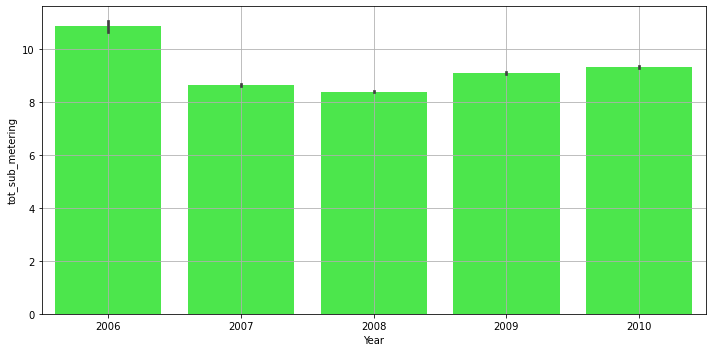

In [56]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Year', y ='tot_sub_metering', data = data, color ='#33ff33' )
plt.tight_layout()
plt.grid(True)
plt.show()

In [57]:
data.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Day,Month,Year,Hour,power_consumption,tot_sub_metering
Global_active_power,1.000000,0.247017,-0.399762,0.998889,-0.012719,0.005424,-0.034328,0.281602,0.701380,0.847252
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.006349,0.012469,0.047018,0.127892,0.211624,0.180690
Voltage,-0.399762,-0.112246,1.000000,-0.411363,0.002248,0.039231,0.254623,-0.176050,-0.271371,-0.345416
Global_intensity,0.998889,0.266120,-0.411363,1.000000,-0.012643,0.004913,-0.038621,0.281972,0.703258,0.844330
Day,-0.012719,0.006349,0.002248,-0.012643,1.000000,0.005613,-0.038537,0.001042,-0.008201,-0.011312
Month,0.005424,0.012469,0.039231,0.004913,0.005613,1.000000,-0.073940,-0.000936,0.013474,-0.002611
Year,-0.034328,0.047018,0.254623,-0.038621,-0.038537,-0.073940,1.000000,-0.000785,-0.088137,0.018654
Hour,0.281602,0.127892,-0.176050,0.281972,0.001042,-0.000936,-0.000785,1.000000,0.294831,0.166061
power_consumption,0.701380,0.211624,-0.271371,0.703258,-0.008201,0.013474,-0.088137,0.294831,1.000000,0.215619
tot_sub_metering,0.847252,0.180690,-0.345416,0.844330,-0.011312,-0.002611,0.018654,0.166061,0.215619,1.000000


In [ ]:
#tot_sub_metering,global_active_power,global_intensity have high correlation

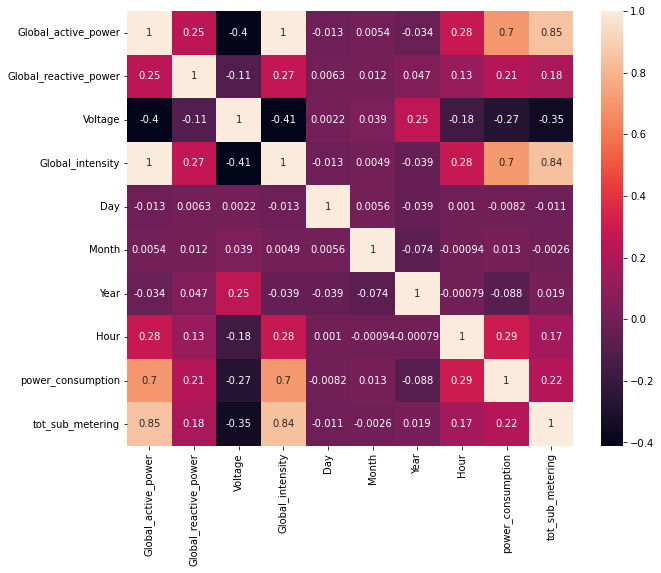

In [58]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [59]:
#Outlier handling

In [36]:
num_col = [col for col in data.columns if data[col].dtypes != 'O']
cat_col = [col for col in data.columns if data[col].dtypes == 'O']

In [37]:
data_num = data[num_col]
data_cat = data[cat_col]

In [38]:
data_num.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Day,Month,Year,Hour,power_consumption,tot_sub_metering
0,4.216,0.418,234.84,18.4,16,12,2006,17,52.266667,18.0
1,5.360,0.436,233.63,23.0,16,12,2006,17,72.333333,17.0
2,5.374,0.498,233.29,23.0,16,12,2006,17,70.566667,19.0
3,5.388,0.502,233.74,23.0,16,12,2006,17,71.800000,18.0
4,3.666,0.528,235.68,15.8,16,12,2006,17,43.100000,18.0


#### 1. Box Plot

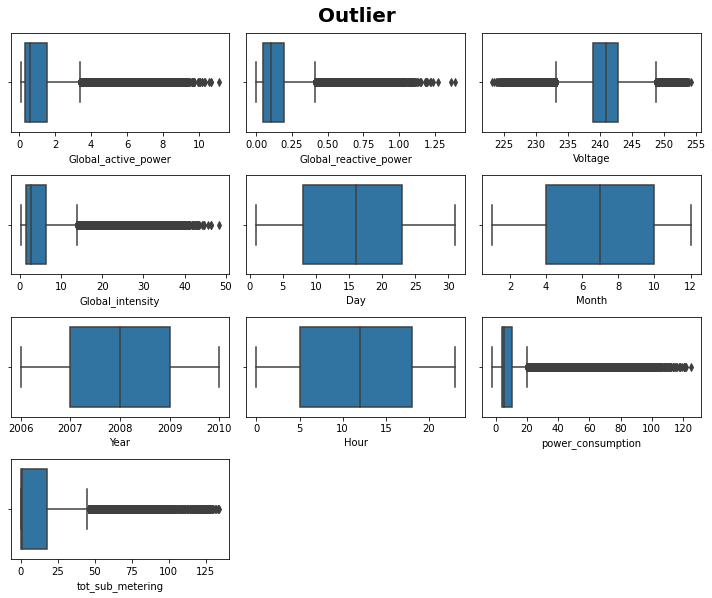

In [51]:
plt.figure(figsize=(10,10))
plt.suptitle('Outlier', fontsize=20, fontweight='bold', alpha=1.)

for i in range(0, len(num_col)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=data_num[num_col[i]])
    plt.xlabel(num_col[i])
    plt.tight_layout()

In [52]:
#outlier are present 

#### 2.Z score method

#since data is not normally distributed z score method not used.

#### 3.Inter Qauntile Method

In [39]:
def handling_outliers(data,column):
    IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
    lower_fence = data[column].quantile(0.25) - (1.5 * IQR)
    higher_fence = data[column].quantile(0.75) + (1.5 * IQR)
    print(column, "---", "IQR --->",IQR)
    print("Lower Fence:",lower_fence)
    print("Higher Fence:", higher_fence)
    print("______________________________________________")
    data.loc[data[column] <=lower_fence, column] = lower_fence
    data.loc[data[column] >=higher_fence, column] = higher_fence


In [40]:
for columns in data_num:
    handling_outliers(data_num,columns)

Global_active_power --- IQR ---> 1.22
Lower Fence: -1.522
Higher Fence: 3.358
______________________________________________
Global_reactive_power --- IQR ---> 0.14600000000000002
Lower Fence: -0.17100000000000004
Higher Fence: 0.41300000000000003
______________________________________________
Voltage --- IQR ---> 3.8999999999999773
Lower Fence: 233.14000000000004
Higher Fence: 248.73999999999995
______________________________________________
Global_intensity --- IQR ---> 5.0
Lower Fence: -6.1
Higher Fence: 13.9
______________________________________________
Day --- IQR ---> 15.0
Lower Fence: -14.5
Higher Fence: 45.5
______________________________________________


C:\Users\anike\AppData\Local\Temp\ipykernel_3620\1319862773.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data[column] <=lower_fence, column] = lower_fence


Month --- IQR ---> 6.0
Lower Fence: -5.0
Higher Fence: 19.0
______________________________________________
Year --- IQR ---> 2.0
Lower Fence: 2004.0
Higher Fence: 2012.0
______________________________________________
Hour --- IQR ---> 13.0
Lower Fence: -14.5
Higher Fence: 37.5
______________________________________________
power_consumption --- IQR ---> 6.566666666666666
Lower Fence: -6.049999999999999
Higher Fence: 20.21666666666667
______________________________________________
tot_sub_metering --- IQR ---> 18.0
Lower Fence: -27.0
Higher Fence: 45.0
______________________________________________


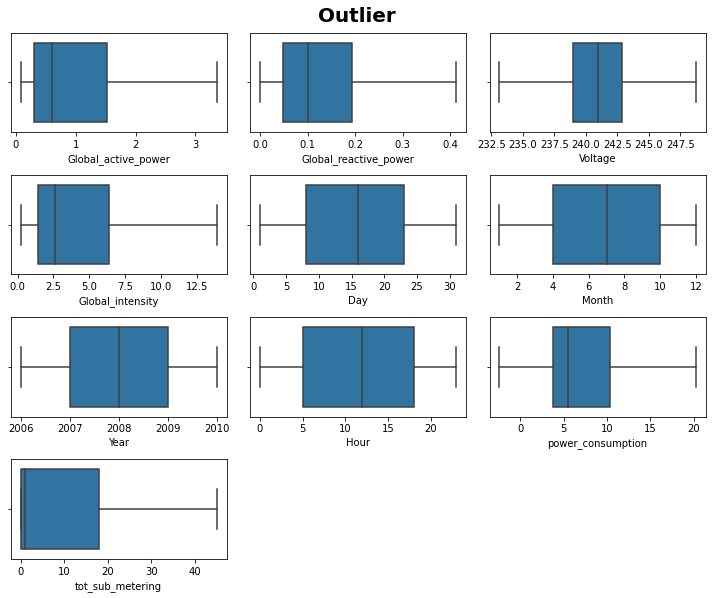

In [41]:
plt.figure(figsize=(10,10))
plt.suptitle('Outlier', fontsize=20, fontweight='bold', alpha=1.)

for i in range(0, len(num_col)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=data_num[num_col[i]])
    plt.xlabel(num_col[i])
    plt.tight_layout()

#scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [42]:
df_new = pd.concat([data_num,data_cat],axis= 1)

In [43]:
df_new.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Day,Month,Year,Hour,power_consumption,tot_sub_metering,Time_of_day
0,3.358,0.413,234.84,13.9,16.0,12,2006,17.0,20.216667,18.0,Evening
1,3.358,0.413,233.63,13.9,16.0,12,2006,17.0,20.216667,17.0,Evening
2,3.358,0.413,233.29,13.9,16.0,12,2006,17.0,20.216667,19.0,Evening
3,3.358,0.413,233.74,13.9,16.0,12,2006,17.0,20.216667,18.0,Evening
4,3.358,0.413,235.68,13.9,16.0,12,2006,17.0,20.216667,18.0,Evening


In [44]:
X=df_new.drop('tot_sub_metering',axis =1)
y=df_new['tot_sub_metering']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [46]:
X_train.shape

(1373017, 10)

In [47]:
y_train.shape

(1373017,)

In [48]:
X_test.shape

(676263, 10)

In [49]:
y_test.shape

(676263,)

In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [51]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

### Linear Regression

In [66]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[-1])
],remainder='passthrough')

step2 = LinearRegression()

pipe_lr = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_lr.fit(X_train,y_train)

y_pred = pipe_lr.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.9063165559468028
MAE 1.7460002727832507
MSE 11.955451225286808
RMSE 3.4576655745295564


### Ridge Regression

In [67]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[-1])
],remainder='passthrough')

step2 = Ridge(alpha=5)

pipe_ridge = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_ridge.fit(X_train,y_train)

y_pred = pipe_ridge.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9063166864146477
MAE 1.7459215802510928


### Lasso Regression

In [68]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[-1])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe_lasso = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_lasso.fit(X_train,y_train)

y_pred = pipe_lasso.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\anike\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.282e+06, tolerance: 1.756e+04
  model = cd_fast.enet_coordinate_descent(


R2 score 0.9062854947651131
MAE 1.7430102699286198


### K Nearest Neighbour

In [69]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[-1])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=10)

pipe_knn = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_knn.fit(X_train,y_train)

y_pred = pipe_knn.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9674630164873853
MAE 0.7677893068229371


### Decision Tree Regressor

In [70]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[-1])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=15)

pipe_dt = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_dt.fit(X_train,y_train)

y_pred = pipe_dt.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.961077595028483
MAE 0.4945336755123102


### SVR

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[-1])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe_svr = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_svr.fit(X_train,y_train)

y_pred = pipe_svr.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

In [ ]:
#Hyperparameter tuning

In [52]:
from sklearn.model_selection import GridSearchCV

In [54]:
#defining the parameter range
param_grid_svr={'C': [0.1,10,100,1000],
           'gamma': [1,0.1,0.01,0.001,0.0001],
           'kernel': ['rbf']}

grid_svr=GridSearchCV(SVR(),param_grid_svr, refit=True, verbose= 3)

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[-1])
],remainder='passthrough')

step2 = grid_svr

pipe_svr = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_svr.fit(X_train,y_train)

y_pred = pipe_svr.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

### Random Forest Regressor

In [71]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[-1])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.75,
                              max_features=0.75,
                              max_depth=20,
                              verbose=3)

pipe_rf = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_rf.fit(X_train,y_train)

y_pred = pipe_rf.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.976983574113945
MAE 0.3533840368216037


In [64]:
param_grid_rf={'n_estimators':[10,20,30,50,75,100],
               'random_state':[3],
               'max_samples':[0.1,0.2,0.5,1],
               'max_features':[0.1,0.2,0.5,1],
               'max_depth':[10,30,50]}

grid_rf=GridSearchCV(RandomForestRegressor(),param_grid_rf, refit=True, verbose= 3)

In [65]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[-1])
],remainder='passthrough')

step2 = grid_rf

pipe_rf = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_rf.fit(X_train,y_train)

y_pred = pipe_rf.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END max_depth=10, max_features=0.1, max_samples=0.1, n_estimators=10, random_state=3;, score=0.828 total time=   2.8s
[CV 2/5] END max_depth=10, max_features=0.1, max_samples=0.1, n_estimators=10, random_state=3;, score=0.860 total time=   2.2s
[CV 3/5] END max_depth=10, max_features=0.1, max_samples=0.1, n_estimators=10, random_state=3;, score=0.838 total time=   2.3s
[CV 4/5] END max_depth=10, max_features=0.1, max_samples=0.1, n_estimators=10, random_state=3;, score=0.833 total time=   2.3s
[CV 5/5] END max_depth=10, max_features=0.1, max_samples=0.1, n_estimators=10, random_state=3;, score=0.856 total time=   2.3s
[CV 1/5] END max_depth=10, max_features=0.1, max_samples=0.1, n_estimators=20, random_state=3;, score=0.839 total time=   4.4s
[CV 2/5] END max_depth=10, max_features=0.1, max_samples=0.1, n_estimators=20, random_state=3;, score=0.847 total time=   4.3s
[CV 3/5] END max_depth=10, max_features=0.1, ma

[CV 5/5] END max_depth=10, max_features=0.1, max_samples=0.5, n_estimators=10, random_state=3;, score=0.837 total time=   6.9s
[CV 1/5] END max_depth=10, max_features=0.1, max_samples=0.5, n_estimators=20, random_state=3;, score=0.846 total time=  13.9s
[CV 2/5] END max_depth=10, max_features=0.1, max_samples=0.5, n_estimators=20, random_state=3;, score=0.847 total time=  13.8s
[CV 3/5] END max_depth=10, max_features=0.1, max_samples=0.5, n_estimators=20, random_state=3;, score=0.854 total time=  13.6s
[CV 4/5] END max_depth=10, max_features=0.1, max_samples=0.5, n_estimators=20, random_state=3;, score=0.857 total time=  13.5s
[CV 5/5] END max_depth=10, max_features=0.1, max_samples=0.5, n_estimators=20, random_state=3;, score=0.851 total time=  13.7s
[CV 1/5] END max_depth=10, max_features=0.1, max_samples=0.5, n_estimators=30, random_state=3;, score=0.851 total time=  20.2s
[CV 2/5] END max_depth=10, max_features=0.1, max_samples=0.5, n_estimators=30, random_state=3;, score=0.855 tot

[CV 5/5] END max_depth=10, max_features=0.2, max_samples=0.1, n_estimators=20, random_state=3;, score=0.923 total time=   6.8s
[CV 1/5] END max_depth=10, max_features=0.2, max_samples=0.1, n_estimators=30, random_state=3;, score=0.915 total time=  11.6s
[CV 2/5] END max_depth=10, max_features=0.2, max_samples=0.1, n_estimators=30, random_state=3;, score=0.925 total time=  10.7s
[CV 3/5] END max_depth=10, max_features=0.2, max_samples=0.1, n_estimators=30, random_state=3;, score=0.919 total time=  10.1s
[CV 4/5] END max_depth=10, max_features=0.2, max_samples=0.1, n_estimators=30, random_state=3;, score=0.926 total time=   9.1s
[CV 5/5] END max_depth=10, max_features=0.2, max_samples=0.1, n_estimators=30, random_state=3;, score=0.925 total time=   8.7s
[CV 1/5] END max_depth=10, max_features=0.2, max_samples=0.1, n_estimators=50, random_state=3;, score=0.920 total time=  14.0s
[CV 2/5] END max_depth=10, max_features=0.2, max_samples=0.1, n_estimators=50, random_state=3;, score=0.925 tot

KeyboardInterrupt: 

In [66]:
grid_search.best_params_

NameError: name 'grid_search' is not defined

In [ ]:
grid_search.best_score_

### Extra Tree Regressor

In [72]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[-1])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_features=0.75,
                              max_depth=15)

pipe_xt = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_xt.fit(X_train,y_train)

y_pred = pipe_xt.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.957893791184532
MAE 0.6879618522177958


### AdaBoostRegressor

In [75]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[-1])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=100,learning_rate=0.5)

pipe_abr = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_abr.fit(X_train,y_train)

y_pred = pipe_abr.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8934960575280327
MAE 2.031801356413196


### GradientBoostRegressor

In [76]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[-1])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=100)

pipe_gbr = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_gbr.fit(X_train,y_train)

y_pred = pipe_gbr.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9445377582884703
MAE 1.0217154934852373


### XgBoostRegressor

In [83]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[-1])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=50,max_depth=15,learning_rate=1)

pipe_xgb = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_xgb.fit(X_train,y_train)

y_pred = pipe_xgb.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))
9975603815

R2 score 0.9662146659716098
MAE 0.4536034511353878


### VotingRegressor

In [84]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[-1])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe_vr = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_vr.fit(X_train,y_train)

y_pred = pipe_vr.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9625198393263138
MAE 0.6521117381548526


### StackingRegressor

In [88]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[-1])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=1,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe_sr = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe_sr.fit(X_train,y_train)

y_pred = pipe_sr.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9671466373964623
MAE 0.559765638519941


In [87]:
import pickle

pickle.dump(df_new,open('df_new.pkl','wb'))
pickle.dump(pipe_rf,open('pipe_rf.pkl','wb'))